In [8]:
#imports
from scipy.spatial import distance_matrix
from random import randrange
import copy
import matplotlib.pyplot as plt
import imageio
import imageio
import random
from time import time
from tqdm import tqdm

In [9]:
#loading datasets 
import numpy as np
kroa={}
krob={}
np_kroa=[]
np_krob=[]
with open('kroa100.txt') as f:
    lines = f.readlines()
    for line in lines[6:-1]:
        x=list(map(int,line.strip().split(' ')))
        #print(x)
        kroa[x[0]]=(x[1],x[2])
        np_kroa.append((x[1],x[2]))
np_kroa=np.array(np_kroa)
with open('krob100.txt') as f:
    lines = f.readlines()
    for line in lines[6:-1]:
        x=list(map(int,line.strip().split(' ')))
        #print(x)
        krob[x[0]]=(x[1],x[2])
        np_krob.append((x[1],x[2]))

np_kroa=np.array(np_kroa)
np_krob=np.array(np_krob)

#calculating distance matrix - https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance_matrix.html
dista=distance_matrix(np_kroa,np_kroa)
distb=distance_matrix(np_krob,np_krob)

In [47]:
#plotting functions
def plotResult(np_dots, cycles):
    plt.plot(np_dots[:,0][cycles[0][0]], np_dots[:,1][cycles[0][0]], "o", markersize=12)
    plt.plot(np_dots[:,0][cycles[1][0]], np_dots[:,1][cycles[1][0]], "o", markersize=12)
    plt.plot(np_dots[:,0][cycles[0]], np_dots[:,1][cycles[0]], "->")
    plt.plot(np_dots[:,0][cycles[1]], np_dots[:,1][cycles[1]], "->")
    plt.show()
    
def plotPartResult(np_dots, cycles,i):
    plt.plot(np_dots[:,0][cycles[0][0]], np_dots[:,1][cycles[0][0]], "o", markersize=12)
    plt.plot(np_dots[:,0][cycles[1][0]], np_dots[:,1][cycles[1][0]], "o", markersize=12)
    plt.plot(np_dots[:,0][cycles[0]], np_dots[:,1][cycles[0]], "->")
    plt.plot(np_dots[:,0][cycles[1]], np_dots[:,1][cycles[1]], "->")
    plt.plot(np_dots[:,0], np_dots[:,1], ".")
    plt.savefig(f'plots/{i}.png')
    plt.show()    
def calcDistance(currentCycle, dist):
    distance = 0
    for x,y in zip(currentCycle, [*currentCycle[1:], currentCycle[0]]):
        distance += dist[x][y]
    return distance 

In [48]:
# 1st variable - Start cycle - with random assignments
def start_cycle_random(dataset_choice="kroa"):
    cycles={}
    cycles[0]=np.random.choice(200,100,replace=False)
    cycles[1]=np.array([i for i in np.arange(0,200,1) if i not in cycles[0]])
    np.random.shuffle(cycles[1])
    return cycles


In [49]:
# 3rd variable - Generate neighbour solution
#changes edges internally
def change_edges(cycles, edge1, edge2, internally=False): # dummy internally
    cI= 0 if len(np.where(cycles[0] == edge1)[0])!=0 else 1 
#     print(cycles[cI])
    inA=np.where(cycles[cI] == edge1)[0][0]
    inB=np.where(cycles[cI] == edge2)[0][0]
    inA += 1
    inB += 1
    cycle = cycles[cI]
    cycle[inA: inB] = np.flip(cycle[inA: inB])
    return cycles

In [50]:
# 3rd variable - Generate neighbour solution
#changes vertex internally or externaly between cycles
def change_vertices(cycles, a, b, internally=True):
    if internally:
#         print(len(np.where(cycles[0] == a)))
#         print(np.where(cycles[0] == a))
        cI= 0 if len(np.where(cycles[0] == a)[0])!=0 else 1 
        inA=np.where(cycles[cI] == a)[0][0]
        inB=np.where(cycles[cI] == b)[0][0]
        tmp=cycles[cI][inA]
        cycles[cI][inA]=b
        cycles[cI][inB]=tmp
        #print(cycles[0][inB], cycles[0][inA])
    else:
        cI= 0 if len(np.where(cycles[0] == a)[0])!=0 else 1 
        cI2 = 1-cI
        inA=np.where(cycles[cI] == a)[0][0]
        inB=np.where(cycles[cI2] == b)[0][0]
        tmp=cycles[cI][inA]
        cycles[cI][inA]=b
        cycles[cI2][inB]=tmp
        #pass
    #print(cycles)
    return cycles
    #if aIndex in cycles[0]
    #raise NotImplementedError

In [51]:
# # 1st variable - Start cycle - with nearest neighbour method
# def start_cycle_heuristic(dataset_choice="kroa"):
#     results=[]
#     min_result=np.inf
#     max_result=0
#     if dataset_choice=="kroa":
#         dataset=np_kroa
#         dic=kroa
#         dist=copy.deepcopy(dista)
#         dist_stable=copy.deepcopy(dista)
#     else:
#         dataset=np_krob
#         dic=krob
#         dist=copy.deepcopy(distb)
#         dist_stable=copy.deepcopy(distb)


#     #zmiana dystansu przekątnej na nieskonczonosc
#     np.fill_diagonal(dist, np.inf)

#     cycles={}
#     cycles[0]=[randrange(200)]
#     cycles[1]=[(np.argsort(dist[cycles[0][0]])[-2])]

#     for b in range(2):
#         dist[:,int(cycles[b][0])]=np.inf

#     chosenCycle=1
#     for i in range(0,198):
#         chosenCycle = int((chosenCycle + 1)%2)
#         candidates=[]
#         for z,index in enumerate(cycles[chosenCycle]):
#             candidates.append((np.argmin(dist[index]),np.min(dist[index]),z))
#         candidates=np.array(candidates)
#         x=np.argmin(candidates[:,1])
#         cycles[chosenCycle]=np.insert(cycles[chosenCycle],int(candidates[x,2]),int(candidates[x,0]))
#         dist[:,int(candidates[x,0])]=np.inf
    
#     #print(f"cycle[0]: {calcDistance(cycles[0], dist_stable)}")
#     #print(f"cycle[1]: {calcDistance(cycles[1], dist_stable)}")
    
#     #SAVING RESULTS 
#     results.append(calcDistance(cycles[0],dist_stable)+calcDistance(cycles[1],dist_stable))
#     if results[-1]>max_result:
#         max_result=results[-1]
#     if results[-1]<min_result:
#         min_result=results[-1]
# #         plt.clf()
# #         plt.plot(dataset[:,0][cycles[0][0]], dataset[:,1][cycles[0][0]], "o", markersize=12)
# #         plt.plot(dataset[:,0][cycles[1][0]], dataset[:,1][cycles[1][0]], "o", markersize=12)
# #         plt.plot(dataset[:,0][cycles[0]], dataset[:,1][cycles[0]], "->")
# #         plt.plot(dataset[:,0][cycles[1]], dataset[:,1][cycles[1]], "->")
# #         plt.savefig(f'best_NN_{dataset_choice}.png')
#     return cycles

In [15]:
# 2nd variable - Find more optimal solution
# switch parameter defines how u find neighbour solutions (is it change_vertices or change_edges func)
def greedy_search(dist, np_dots, init_random = False, switch="change_edges"):
    #specify cycles initialization.
    if init_random:
        cycles = start_cycle_random()
    else:
        cycles = start_cycle_heuristic()
        
    #print(cycles)
    
    if switch == "change_vertices":
        internal_change = change_vertices
    elif switch == "change_edges":
        internal_change = change_edges
    else:
        print(f"Unknow mode {switch}. Select change_vertices or change_edges")
        return
    
    
    
    bestDistance = 0
    bestDistance += calcDistance(cycles[0], dist) 
    bestDistance += calcDistance(cycles[1], dist) 
    #print(f"Initial distance: {bestDistance}")
    
    #plotPartResult(np_dots, cycles)
    
    
    done = False
    while not done:
        done = True
        #-------------calculating possible moves
        possible_moves = []
        
        mesh = np.array(np.meshgrid(cycles[0], cycles[1]))
        combinations = mesh.T.reshape(-1, 2)
        for x in combinations:
            possible_moves.append(["external", x])

        mesh = np.array(np.meshgrid(cycles[0], cycles[0]))
        mesh = np.concatenate((mesh,np.array(np.meshgrid(cycles[1], cycles[1]))),axis=0)
        combinations = mesh.T.reshape(-1, 2)
        for x in combinations:
            possible_moves.append(["internal", x])
        
        possible_moves = np.array(possible_moves)
        i = np.random.choice(range(len(possible_moves)),len(possible_moves),replace=False)
        possible_moves = possible_moves[i]
        

        for move, edges in possible_moves:
#             print(move, edges)
            cyclesCopy = copy.deepcopy(cycles)
            edge1 = edges[0]
            edge2 = edges[1]
            
#             print(edge1, edge2)
            if move == "internal":
                cyclesCopy = internal_change(cyclesCopy, edge1, edge2, internally=True)
            else:
                cyclesCopy = change_vertices(cyclesCopy, edge1, edge2, False)
#             plotPartResult(np_dots, cycles)
            currentDistance = 0
            currentDistance += calcDistance(cyclesCopy[0], dist)
            currentDistance += calcDistance(cyclesCopy[1], dist)
            if currentDistance < bestDistance:
                #print(f"New best distance: {currentDistance}, changed {edge1} with {edge2} on {move}")
                cycles = cyclesCopy
                bestDistance = currentDistance
                done = False
                break
    
#     plotPartResult(np_dots, cycles)
#     plt.show()
    return cycles, bestDistance
    

In [18]:
K = 2 # docelowo 10
N = 3 # docelowo 100

In [ ]:
#MAIN - tu poskladac wyzej zaimplementowane funkcje w 8 roznych kombinacji algorytmow i sprawdzic ich czasy i wyplotowac skutecznosci


for dataset_choice in ['kroa', 'krob']:
    if dataset_choice=="kroa":
        dataset=np_kroa
        dist=copy.deepcopy(dista)
    else:
        dataset=np_krob
        dist=copy.deepcopy(distb)
    
    timeTable = []
    cyclesTable = []
    distanceTable = []
    for _ in range(K):
        
        distanceTableBuffer = []
        cyclesTableBuffer = []
        bestDistance = 0
        startTime = time()
        for _ in tqdm(range(N)):

            cycles, bestDistance = greedy_search(dist, dataset, init_random = True, switch="change_edges")
            distanceTableBuffer.append(bestDistance)
            cyclesTableBuffer.append(cycles)
        timeTable.append(time() - startTime)
        distanceTable.append(np.min(distanceTableBuffer))
        cyclesTable.append( cyclesTableBuffer[np.argmin(distanceTableBuffer) ] )
    
    print(f"greedy_search- time_mean:{np.mean(timeTable)},  time_min:{np.min(timeTable)}, time_max:{np.max(timeTable)}, min:{np.min(distanceTable)}, max:{np.max(distanceTable)}, mean:{np.mean(distanceTable)}")


    cycles = cyclesTable[np.argmin(distanceTable)]
    plt.clf()
    plt.plot(dataset[:,0][cycles[0][0]], dataset[:,1][cycles[0][0]], "o", markersize=12)
    plt.plot(dataset[:,0][cycles[1][0]], dataset[:,1][cycles[1][0]], "o", markersize=12)                
    plt.plot(dataset[:,0][[*cycles[0],cycles[0][0]]], dataset[:,1][[*cycles[0],cycles[0][0]]], "->")
    plt.plot(dataset[:,0][[*cycles[1],cycles[1][1]]], dataset[:,1][[*cycles[1],cycles[1][1]]], "->")
    plt.show()
    
    plt.savefig(f'greedy_search_best_NN_randomTrue_changeEdges_{dataset_choice}.png')








  0%|          | 0/3 [00:00<?, ?it/s]/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray






 33%|███▎      | 1/3 [02:01<04:03, 121.99s/it]





 67%|██████▋   | 2/3 [04:07<02:03, 123.12s/it]

##  (ILS1) Iterated local search - Iteracyjne przeszukiwanie lokalne z niewielką perturbacją,

In [45]:
# 2nd variable - Find more optimal solution
# switch parameter defines how u find neighbour solutions (is it change_vertices or change_edges func)
def ILS1(dist, np_dots, init_random = True, switch="change_edges", durationSec=10, shakeIt=3):
    #specify cycles initialization.
    if init_random:
        cycles = start_cycle_random()
    else:
        cycles = start_cycle_heuristic()
        
    #print(cycles)
    
    if switch == "change_vertices":
        internal_change = change_vertices
    elif switch == "change_edges":
        internal_change = change_edges
    else:
        print(f"Unknow mode {switch}. Select change_vertices or change_edges")
        return
    
    bestDistance = 0
    bestDistance += calcDistance(cycles[0], dist) 
    bestDistance += calcDistance(cycles[1], dist) 
    #print(f"Initial distance: {bestDistance}")
    
    #plotPartResult(np_dots, cycles)
    
    
    startTime = time()
    while True:
        #-------------calculating possible moves
        possible_moves = []
        
        mesh = np.array(np.meshgrid(cycles[0], cycles[1]))
        combinations = mesh.T.reshape(-1, 2)
        for x in combinations:
            possible_moves.append(["external", x])

        mesh = np.array(np.meshgrid(cycles[0], cycles[0]))
        mesh = np.concatenate((mesh,np.array(np.meshgrid(cycles[1], cycles[1]))),axis=0)
        combinations = mesh.T.reshape(-1, 2)
        for x in combinations:
            possible_moves.append(["internal", x])
        
        possible_moves = np.array(possible_moves)
        i = np.random.choice(range(len(possible_moves)),len(possible_moves),replace=False)
        possible_moves = possible_moves[i]
        
        bestPossible = True
        print(len(possible_moves))
        for move, edges in possible_moves:
#             print(move, edges)
            cyclesCopy = copy.deepcopy(cycles)
            edge1 = edges[0]
            edge2 = edges[1]
            
#             print(edge1, edge2)
            if move == "internal":
                cyclesCopy = internal_change(cyclesCopy, edge1, edge2, internally=True)
            else:
                cyclesCopy = change_vertices(cyclesCopy, edge1, edge2, False)
#             plotPartResult(np_dots, cycles)
            currentDistance = 0
            currentDistance += calcDistance(cyclesCopy[0], dist)
            currentDistance += calcDistance(cyclesCopy[1], dist)
            if currentDistance < bestDistance:
                print(f"New best distance: {currentDistance}, changed {edge1} with {edge2} on {move}")
                cycles = cyclesCopy
                bestDistance = currentDistance
                bestPossible = False
                break
        
        if not bestPossible:
            continue
        plotResult(np_dots, cycles)
        
        if time() - startTime > durationSec:
            break
        
        # Shake it
        
        for _ in range(shakeIt):
            possible_moves = []

            mesh = np.array(np.meshgrid(cycles[0], cycles[1]))
            combinations = mesh.T.reshape(-1, 2)
            for x in combinations:
                possible_moves.append(["external", x])

            mesh = np.array(np.meshgrid(cycles[0], cycles[0]))
            mesh = np.concatenate((mesh,np.array(np.meshgrid(cycles[1], cycles[1]))),axis=0)
            combinations = mesh.T.reshape(-1, 2)
            for x in combinations:
                possible_moves.append(["internal", x])

            possible_moves = np.array(possible_moves)
            i = np.random.choice(range(len(possible_moves)),1,replace=False)
            possible_moves = possible_moves[i]
            
            for move, edges in possible_moves:
                edge1 = edges[0]
                edge2 = edges[1]

                print(edge1, edge2)
                if move == "internal":
                    cycles = internal_change(cycles, edge1, edge2, internally=True)
                else:
                    cycles = change_vertices(cycles, edge1, edge2, False)
    
        plotResult(np_dots, cycles)
            
    
#     plotPartResult(np_dots, cycles)
#     plt.show()
    return cycles, bestDistance







  0%|          | 0/2 [00:00<?, ?it/s]/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500
New best distance: 156583.5839422564, changed 25 with 63 on internal
7500
New best distance: 153431.37809340213, changed 80 with 96 on internal
7500
New best distance: 153393.35387586118, changed 13 with 8 on external
7500
New best distance: 153133.94604234534, changed 15 with 62 on external
7500
New best distance: 152153.19785792782, changed 66 with 64 on internal
7500
New best distance: 152063.7619548572, changed 20 with 4 on internal
7500
New best distance: 151654.28355606267, changed 90 with 47 on internal
7500
New best distance: 149936.40594860556, changed 5 with 59 on external
7500
New best distance: 149778.67966172672, changed 41 with 63 on internal
7500
New best distance: 148424.17171112745, changed 79 with 53 on external
7500
New best distance: 146417.60535334042, changed 68 with 75 on external
7500
New best distance: 145491.96192424893, changed 62 with 23 on internal
7500
New best distance: 144735.72860578785, changed 22 with 34 on internal
7500
New best distance: 144685

7500
New best distance: 69150.69058094874, changed 19 with 9 on external
7500
New best distance: 68459.0857799098, changed 4 with 82 on external
7500
New best distance: 68395.97454639737, changed 89 with 57 on internal
7500
New best distance: 67986.94439085407, changed 47 with 48 on external
7500
New best distance: 66809.04978212019, changed 32 with 44 on internal
7500
New best distance: 66116.23668346636, changed 54 with 80 on internal
7500
New best distance: 66073.69785839705, changed 80 with 32 on internal
7500
New best distance: 65711.4734954105, changed 60 with 81 on internal
7500
New best distance: 65402.99252197707, changed 72 with 95 on internal
7500
New best distance: 65326.5347048901, changed 26 with 19 on external
7500
New best distance: 64028.01034782505, changed 94 with 97 on internal
7500
New best distance: 63951.688217621224, changed 27 with 1 on internal
7500
New best distance: 63927.07366292129, changed 54 with 30 on internal
7500
New best distance: 63561.71161752209, 

New best distance: 35972.29006067614, changed 9 with 43 on external
7500
New best distance: 35879.45291948478, changed 66 with 64 on internal
7500
New best distance: 35370.77073478543, changed 0 with 98 on internal
7500
New best distance: 35290.47969453803, changed 26 with 39 on external
7500
New best distance: 34557.061313725615, changed 91 with 65 on external
7500
New best distance: 34517.85703166353, changed 50 with 81 on internal
7500
New best distance: 34232.98027863502, changed 12 with 0 on internal
7500
New best distance: 34135.13244313626, changed 79 with 61 on internal
7500
New best distance: 33961.60875586032, changed 18 with 48 on internal
7500
New best distance: 33828.650255070024, changed 35 with 68 on internal
7500
New best distance: 33819.43717029132, changed 52 with 13 on internal
7500
New best distance: 33806.930850739605, changed 10 with 43 on internal
7500
New best distance: 33760.730939230096, changed 54 with 30 on external
7500
New best distance: 33759.87614638657,

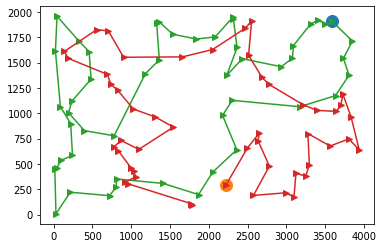

19 6
73 90
67 37


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


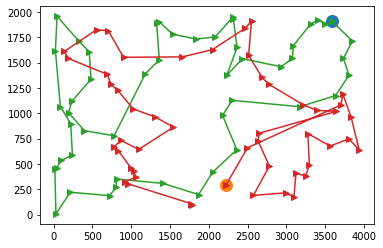

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


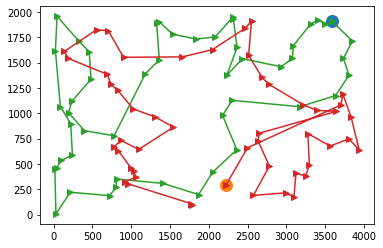

19 76
87 0
77 67


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


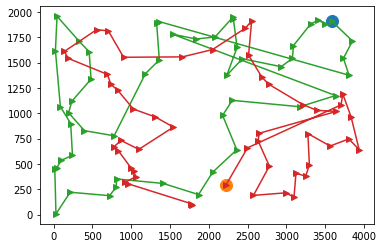

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


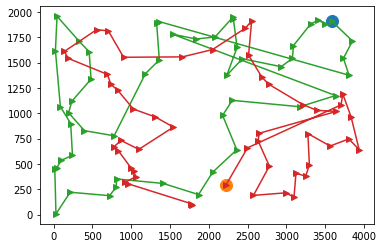

34 41
25 31
66 59


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


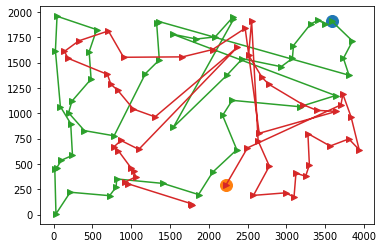

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


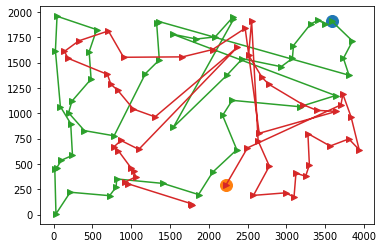

70 37
64 98
79 89


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


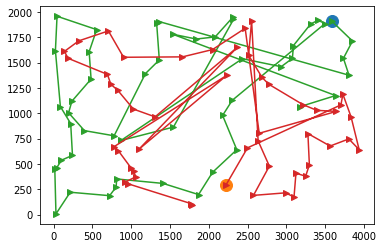

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


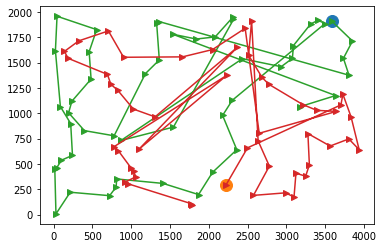

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


61 71
89 80
38 75


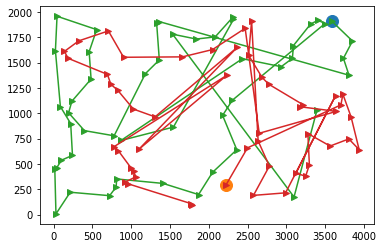

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


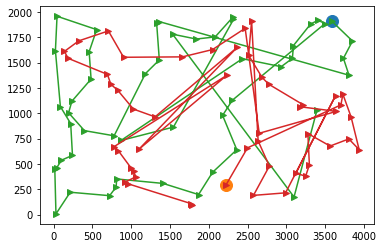

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


28 93
81 3
9 20


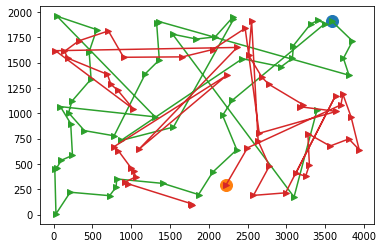

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


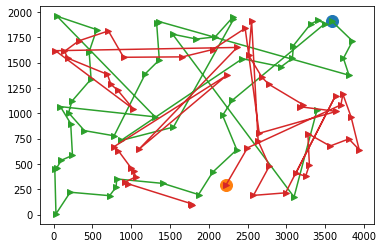

75 2
96 57
57 1


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


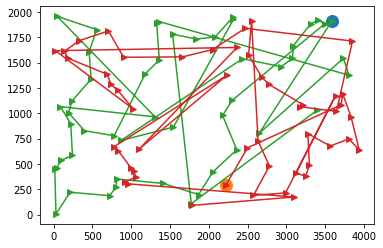

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


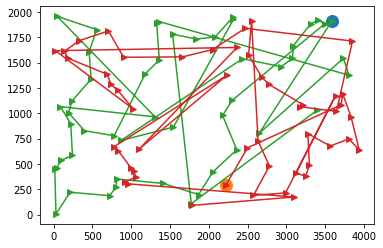

83 76
94 66
33 80


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


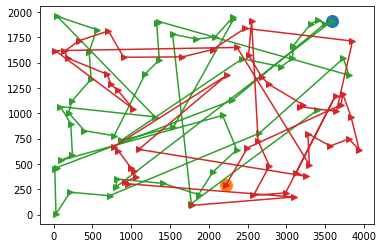

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


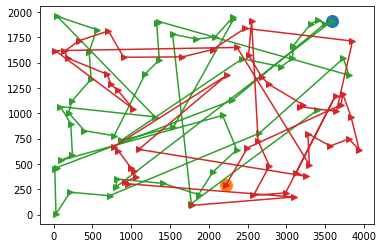

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


24 35
84 16
84 29


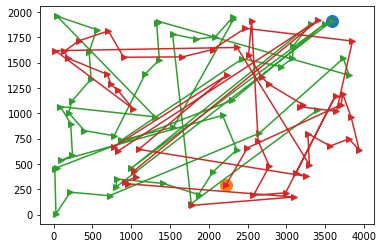

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


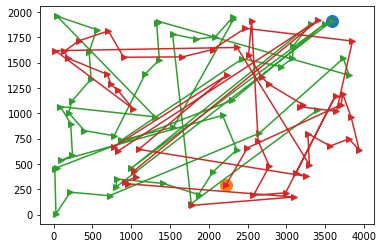

56 27
35 95
62 79


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


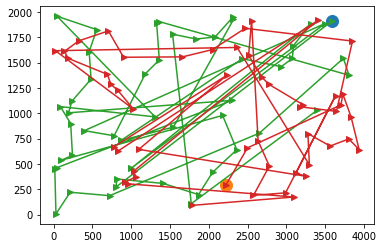

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


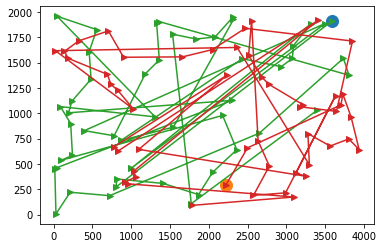

88 9
99 17
74 11


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


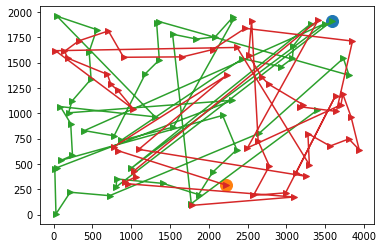

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


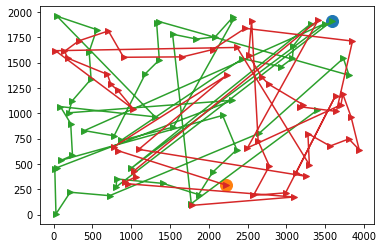

52 58
84 66
27 55


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


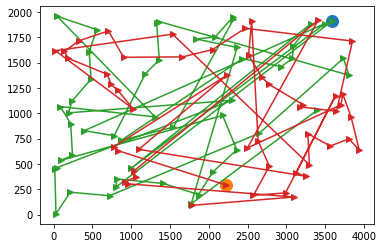

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


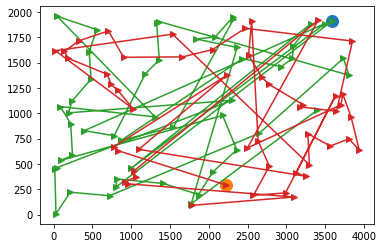

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


19 58
63 84
98 62


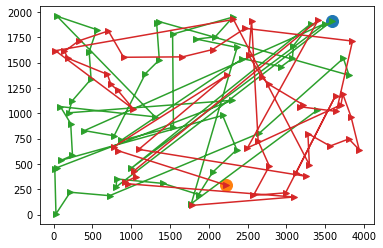

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


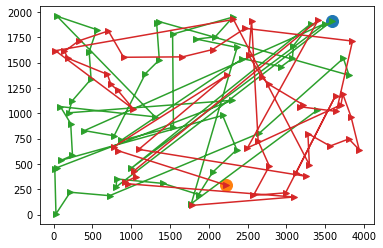

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


87 20
5 70
75 34


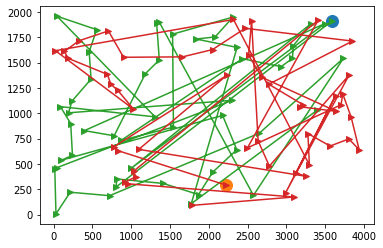

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


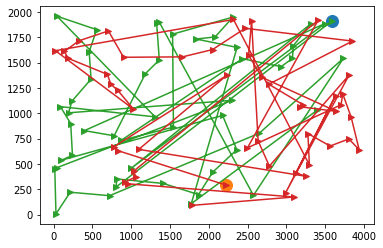







 50%|█████     | 1/2 [00:30<00:30, 30.65s/it]/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500
New best distance: 169694.85185879364, changed 11 with 44 on external
7500
New best distance: 169619.02097836463, changed 28 with 38 on internal
7500
New best distance: 169201.75731361212, changed 20 with 54 on external
7500
New best distance: 167369.5948154422, changed 86 with 70 on external
7500
New best distance: 166807.92737690813, changed 31 with 28 on external
7500
New best distance: 166770.6679137047, changed 65 with 55 on internal
7500
New best distance: 164503.94953899214, changed 0 with 10 on internal
7500
New best distance: 161881.41070323327, changed 50 with 42 on external
7500
New best distance: 158756.15466331755, changed 53 with 37 on internal
7500
New best distance: 157270.13051685086, changed 33 with 89 on internal
7500
New best distance: 156704.92695261526, changed 43 with 68 on internal
7500
New best distance: 155164.26549813815, changed 58 with 40 on internal
7500
New best distance: 153737.7900557753, changed 56 with 48 on internal
7500
New best distance: 15342

7500
New best distance: 83495.62762734063, changed 55 with 24 on internal
7500
New best distance: 82891.31444968015, changed 17 with 36 on internal
7500
New best distance: 82729.85070688269, changed 76 with 5 on internal
7500
New best distance: 82469.03150793271, changed 66 with 63 on external
7500
New best distance: 81847.61627631242, changed 36 with 23 on internal
7500
New best distance: 80846.63760204468, changed 67 with 1 on internal
7500
New best distance: 80390.0997828643, changed 96 with 73 on internal
7500
New best distance: 80076.47145258528, changed 87 with 4 on internal
7500
New best distance: 80059.57870647284, changed 52 with 99 on internal
7500
New best distance: 79701.55040953116, changed 77 with 0 on external
7500
New best distance: 79125.51414652792, changed 68 with 40 on external
7500
New best distance: 79057.68657420258, changed 91 with 18 on external
7500
New best distance: 76377.50735991073, changed 59 with 71 on internal
7500
New best distance: 75001.02139918265, 

7500
New best distance: 45833.39869961652, changed 91 with 9 on external
7500
New best distance: 45804.345793119224, changed 26 with 11 on external
7500
New best distance: 45673.153630761655, changed 84 with 0 on external
7500
New best distance: 44905.77902802237, changed 17 with 26 on external
7500
New best distance: 44900.97769993621, changed 14 with 19 on internal
7500
New best distance: 44893.837586958995, changed 65 with 47 on internal
7500
New best distance: 44821.43362591648, changed 15 with 43 on internal
7500
New best distance: 44774.52742660388, changed 0 with 52 on external
7500
New best distance: 44373.82392870291, changed 46 with 21 on internal
7500
New best distance: 44081.58303307906, changed 9 with 80 on external
7500
New best distance: 42561.25241054398, changed 52 with 28 on external
7500
New best distance: 41538.983285422626, changed 11 with 23 on external
7500
New best distance: 41335.25866367582, changed 82 with 5 on external
7500
New best distance: 41241.029462132

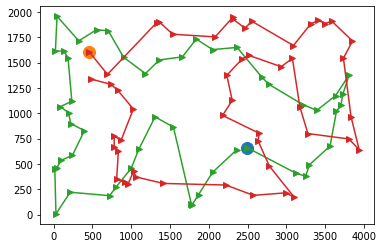

83 20
63 17
51 87


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


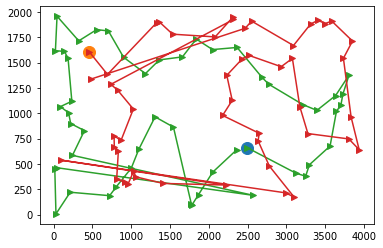

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


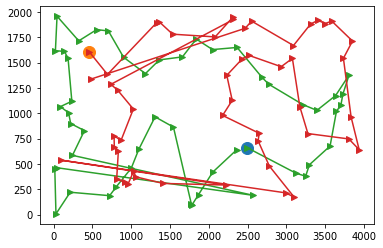

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


84 9
6 91
2 51


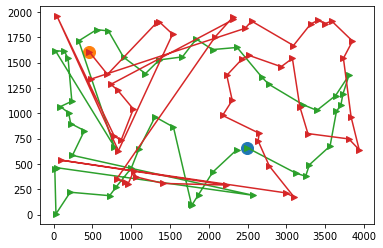

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


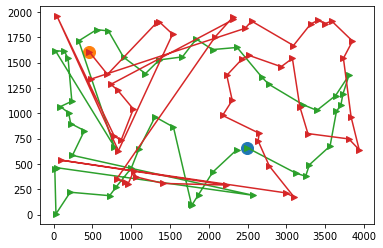

55 0
25 62
53 92


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


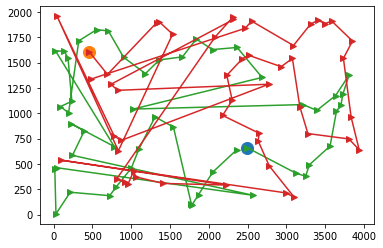

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


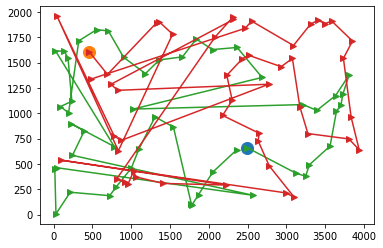

21 56
50 0
46 49


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


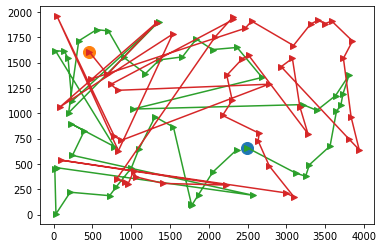

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


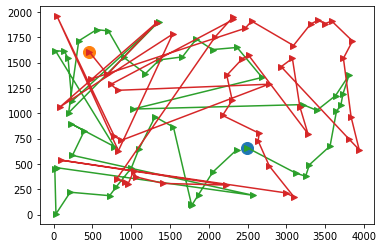

24 6
67 25
17 6


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


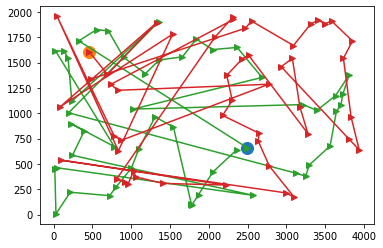

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


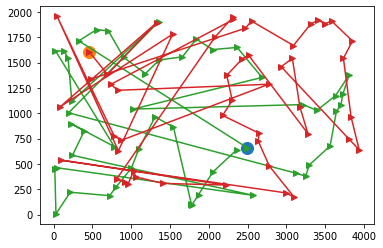

40 66
70 45
40 23


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


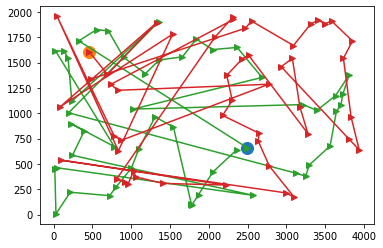

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


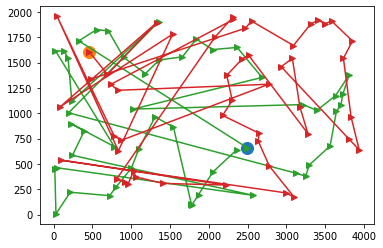

45 62
51 27
30 76


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


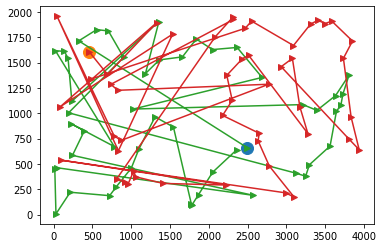

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


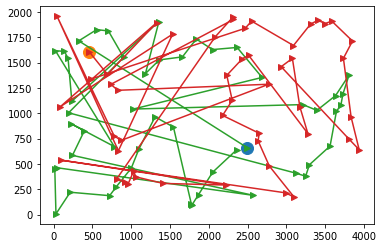

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


53 60
25 68
54 55


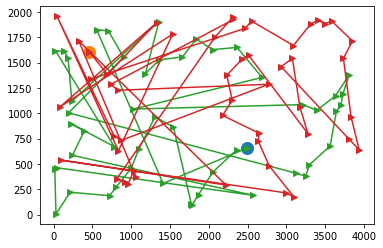

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


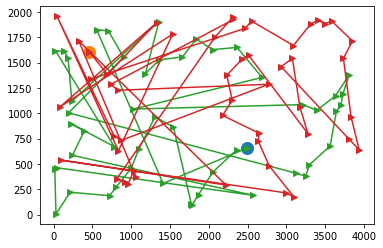

85 78
2 8
58 53


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


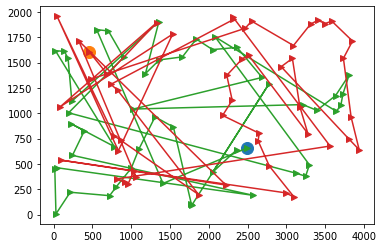

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


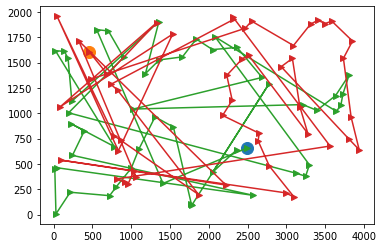

96 4
60 17
35 84


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


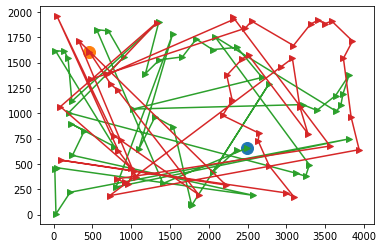

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


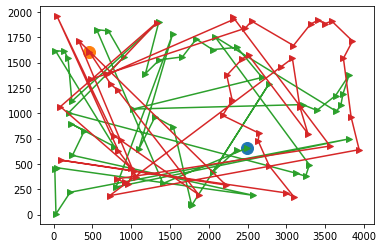

9 34
13 22
26 33


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


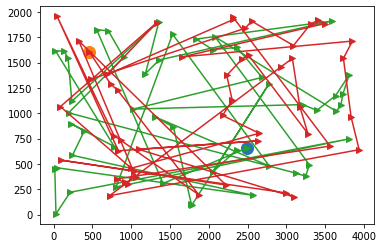

7500

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


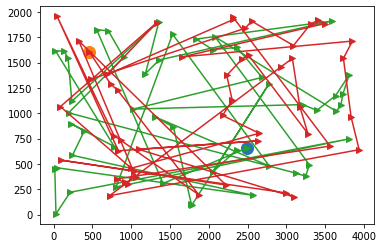

71 75
92 94
26 76


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


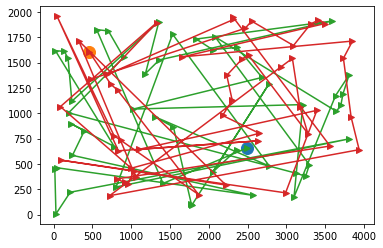

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


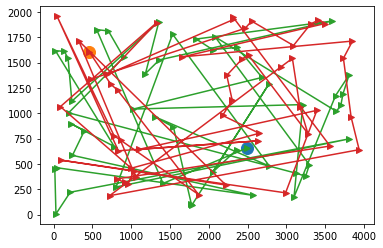







100%|██████████| 2/2 [01:01<00:00, 30.65s/it]

greedy_search- min:26483.646432777634, max:27425.65769552988, mean:26954.652064153757


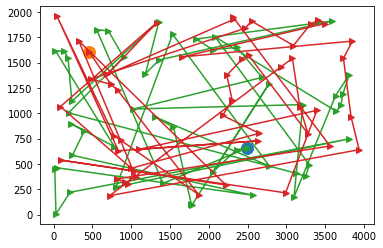







  0%|          | 0/2 [00:00<?, ?it/s]/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500
New best distance: 164173.64168552484, changed 12 with 98 on external
7500
New best distance: 160120.6774914603, changed 90 with 59 on external
7500
New best distance: 160030.5664643806, changed 45 with 90 on internal
7500
New best distance: 157465.9388336388, changed 69 with 33 on external
7500
New best distance: 157445.51371757587, changed 96 with 34 on internal
7500
New best distance: 156974.41220595973, changed 23 with 13 on external
7500
New best distance: 156881.03466291568, changed 52 with 18 on internal
7500
New best distance: 151060.48835998244, changed 99 with 81 on external
7500
New best distance: 148797.90871270208, changed 9 with 26 on external
7500
New best distance: 147356.58704631028, changed 42 with 47 on external
7500
New best distance: 146627.2020315372, changed 41 with 76 on internal
7500
New best distance: 146579.9131316907, changed 91 with 19 on internal
7500
New best distance: 146476.92592955925, changed 79 with 78 on internal
7500
New best distance: 145811.

7500
New best distance: 71159.4959520761, changed 74 with 71 on internal
7500
New best distance: 70973.86413371892, changed 9 with 89 on internal
7500
New best distance: 70924.59574691315, changed 77 with 40 on internal
7500
New best distance: 70651.87615225208, changed 80 with 51 on internal
7500
New best distance: 70608.28720862725, changed 43 with 1 on external
7500
New best distance: 70420.28816805738, changed 14 with 62 on external
7500
New best distance: 69733.0098525815, changed 76 with 23 on internal
7500
New best distance: 69095.2830727436, changed 1 with 13 on internal
7500
New best distance: 68316.98939342426, changed 9 with 68 on internal
7500
New best distance: 68076.58901300022, changed 58 with 98 on internal
7500
New best distance: 68057.95063517641, changed 87 with 18 on internal
7500
New best distance: 67118.72414182131, changed 51 with 53 on internal
7500
New best distance: 66722.9616933306, changed 22 with 11 on internal
7500
New best distance: 66293.22672913692, cha

7500
New best distance: 40958.94447184161, changed 98 with 96 on external
7500
New best distance: 40887.335505958035, changed 81 with 12 on internal
7500
New best distance: 40585.55517933239, changed 46 with 88 on internal
7500
New best distance: 40465.14395779435, changed 49 with 54 on internal
7500
New best distance: 40264.60811419547, changed 27 with 98 on external
7500
New best distance: 40140.3774537078, changed 10 with 2 on external
7500
New best distance: 39989.97684844986, changed 9 with 69 on internal
7500
New best distance: 39796.51746542436, changed 67 with 29 on external
7500
New best distance: 39538.01642127677, changed 9 with 67 on internal
7500
New best distance: 39460.53702697487, changed 4 with 69 on internal
7500
New best distance: 39242.5489546448, changed 70 with 24 on internal
7500
New best distance: 39227.31595666648, changed 78 with 46 on internal
7500
New best distance: 38739.91143923627, changed 6 with 83 on internal
7500
New best distance: 38674.296480090925, 

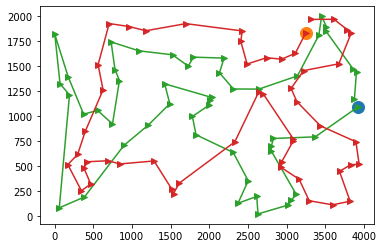

57 46
35 85
73 80


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


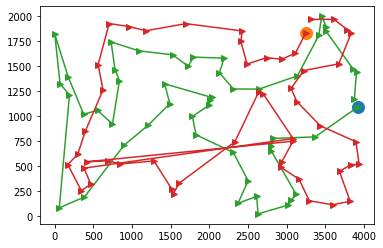

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


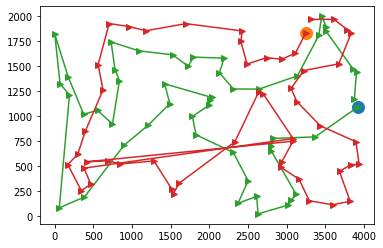

91 29
47 79
42 68


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


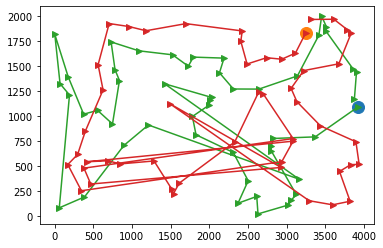

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


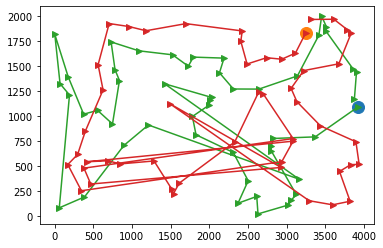

93 59
37 27
7 75


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


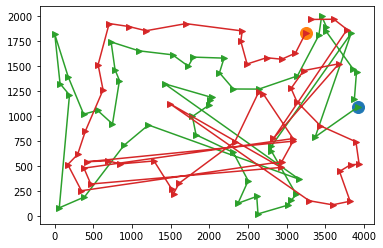

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


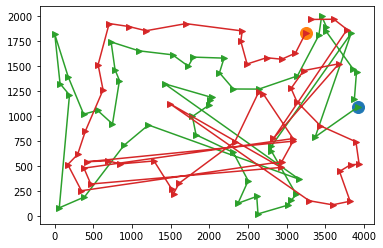

43 42
24 23
43 61


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


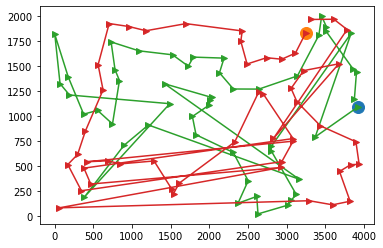

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


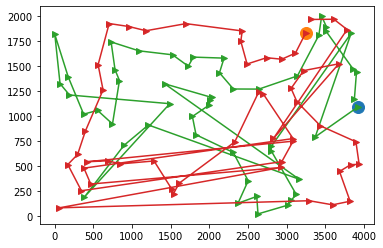

91 70
72 97
42 86


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


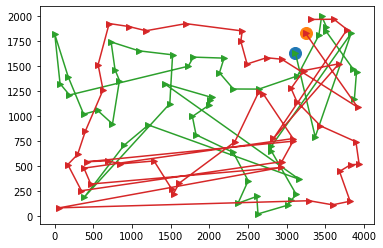

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


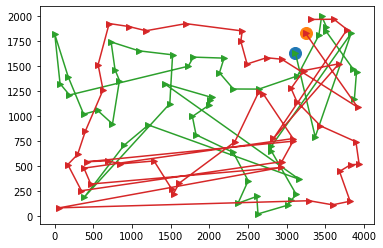

35 4
80 28
11 85


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


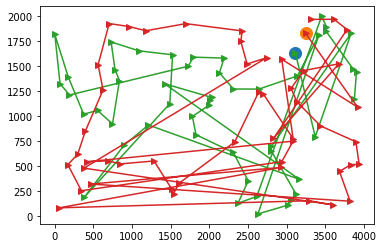

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


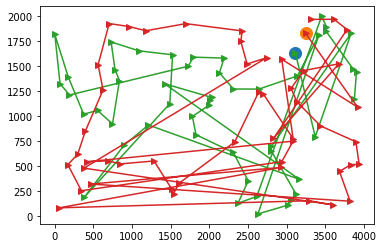

23 40
18 26
57 68


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


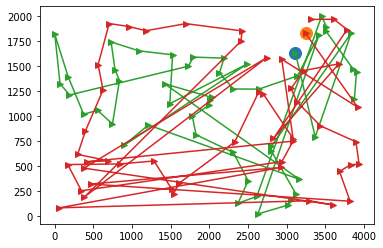

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


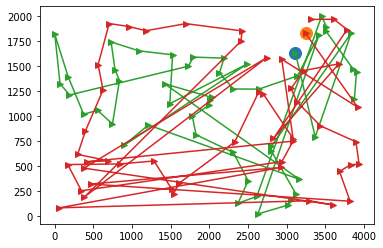

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


1 70
12 88
13 6


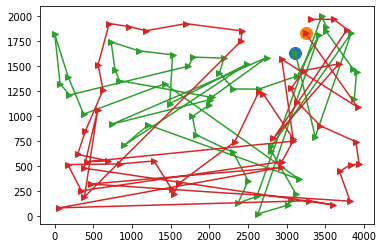

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


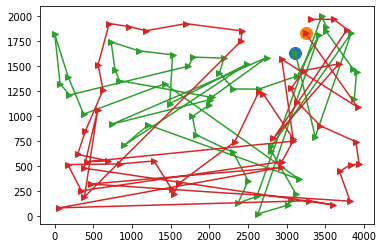

53 59
16 1
70 14


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


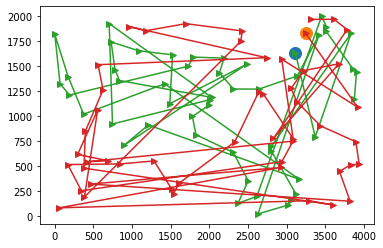

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


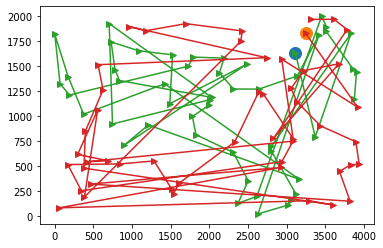

43 17
75 28
49 72


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


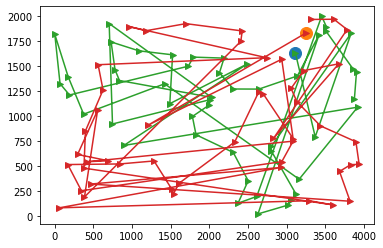

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


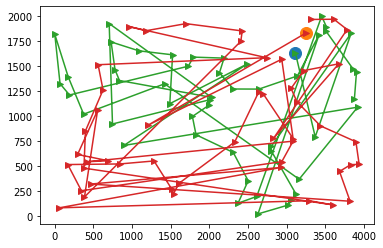

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


54 66
0 20
27 70


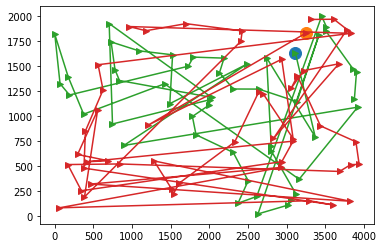

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


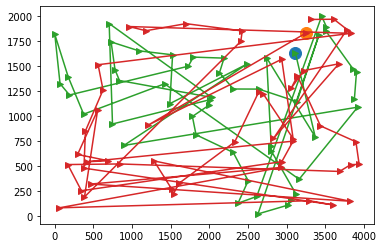

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


84 1
83 26
64 86


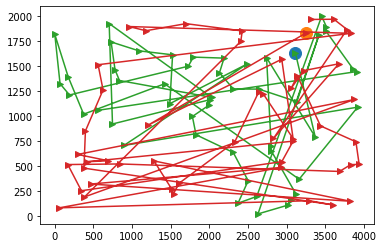

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


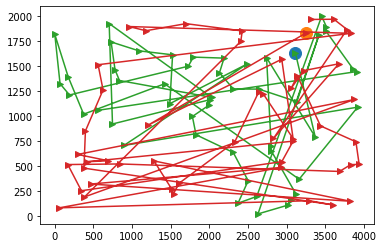

23 38
68 54
16 34


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


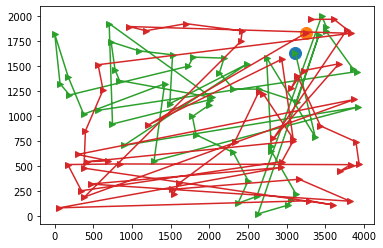

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


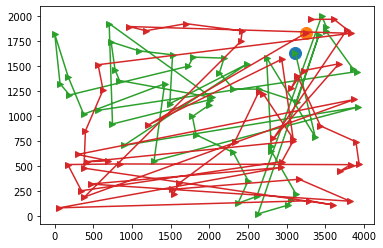







 50%|█████     | 1/2 [00:30<00:30, 30.02s/it]/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500
New best distance: 170586.48383730196, changed 85 with 87 on external
7500
New best distance: 169581.56655685508, changed 94 with 5 on internal
7500
New best distance: 169116.0179405518, changed 91 with 25 on external
7500
New best distance: 168135.55383409787, changed 63 with 83 on internal
7500
New best distance: 166495.7705572627, changed 51 with 15 on internal
7500
New best distance: 165490.40848492802, changed 74 with 53 on internal
7500
New best distance: 165286.47454041283, changed 82 with 22 on external
7500
New best distance: 165015.31293217483, changed 64 with 66 on internal
7500
New best distance: 164222.76441428458, changed 72 with 61 on external
7500
New best distance: 161739.34653133532, changed 51 with 14 on external
7500
New best distance: 161024.52733058282, changed 22 with 19 on external
7500
New best distance: 160855.0456390688, changed 95 with 21 on internal
7500
New best distance: 160134.13227630014, changed 8 with 24 on internal
7500
New best distance: 159940

7500
New best distance: 80127.58663359848, changed 33 with 53 on external
7500
New best distance: 79665.0160516242, changed 42 with 13 on external
7500
New best distance: 79393.44544348355, changed 40 with 54 on external
7500
New best distance: 77517.62854986041, changed 88 with 6 on internal
7500
New best distance: 77467.44918038655, changed 71 with 80 on internal
7500
New best distance: 77293.85358111319, changed 84 with 7 on internal
7500
New best distance: 76597.56934006448, changed 14 with 1 on external
7500
New best distance: 76556.67331737228, changed 23 with 87 on internal
7500
New best distance: 74409.64015960063, changed 21 with 79 on internal
7500
New best distance: 73960.52190734596, changed 26 with 24 on external
7500
New best distance: 73560.4416319724, changed 20 with 96 on internal
7500
New best distance: 73517.0875954105, changed 64 with 79 on external
7500
New best distance: 72892.35897341467, changed 23 with 76 on internal
7500
New best distance: 72741.1268585884, ch

New best distance: 40566.86622732645, changed 27 with 2 on internal
7500
New best distance: 40407.7982031256, changed 46 with 64 on internal
7500
New best distance: 40341.0816001419, changed 65 with 82 on external
7500
New best distance: 40219.438899590714, changed 93 with 60 on internal
7500
New best distance: 40219.43889959071, changed 11 with 45 on internal
7500
New best distance: 39659.391818996475, changed 89 with 20 on internal
7500
New best distance: 39638.954000349666, changed 83 with 53 on internal
7500
New best distance: 39528.82725865451, changed 36 with 64 on internal
7500
New best distance: 39433.88244813906, changed 65 with 22 on internal
7500
New best distance: 38819.847077999584, changed 26 with 57 on internal
7500
New best distance: 38659.80724276523, changed 79 with 37 on external
7500
New best distance: 38614.81164506163, changed 97 with 31 on internal
7500
New best distance: 38502.725522042674, changed 57 with 83 on external
7500
New best distance: 38502.72552204267

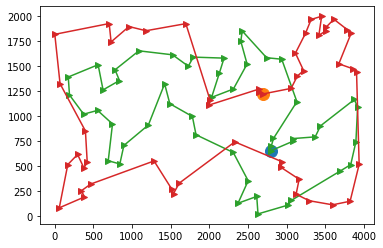

20 49
23 96
66 21


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


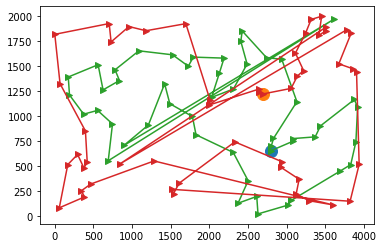

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


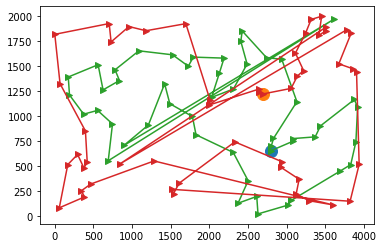

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


37 66
76 87
9 54


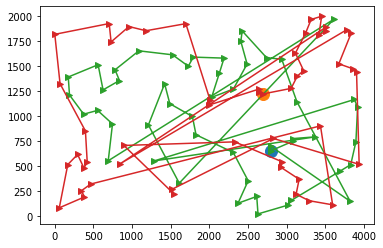

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


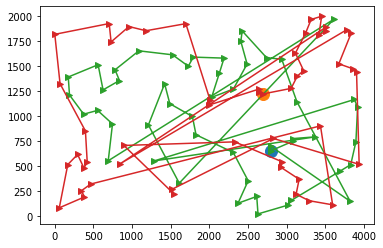

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


64 21
8 7
93 76


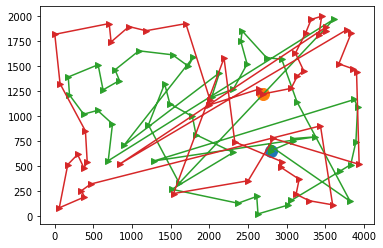

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


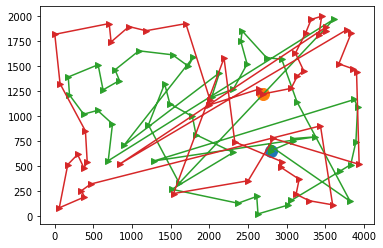

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


91 98
13 40
59 8


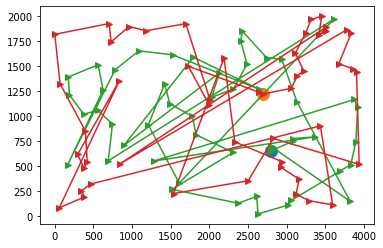

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


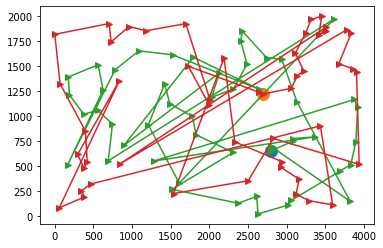

72 44
79 64
65 95


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


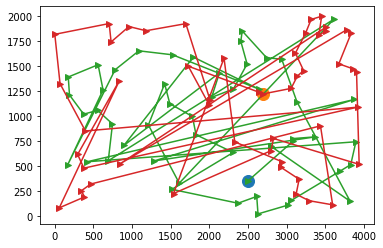

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


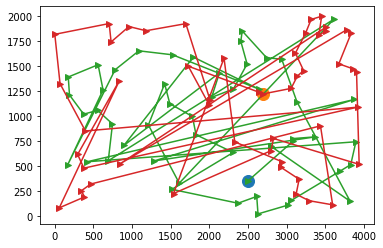

93 29
27 58
45 22


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


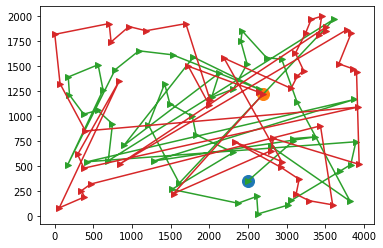

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


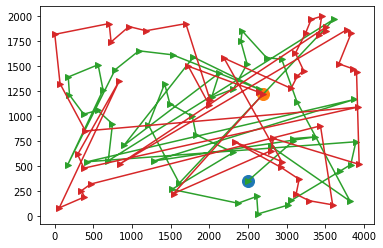

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


81 6
40 78
55 4


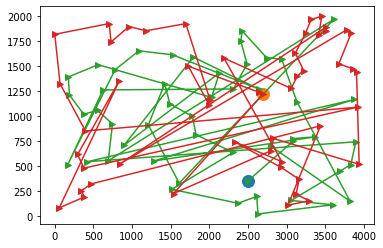

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


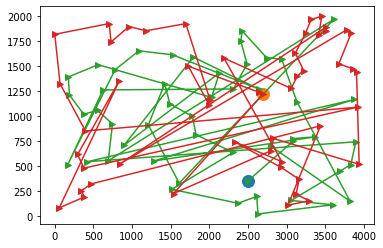

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


53 42
10 79
42 1


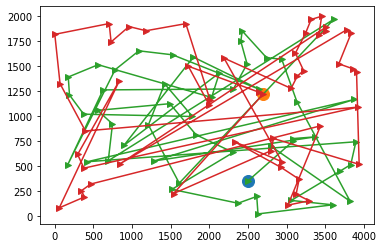

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


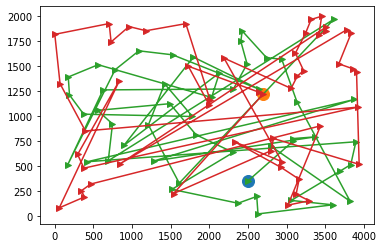

60 65
65 16
76 44


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


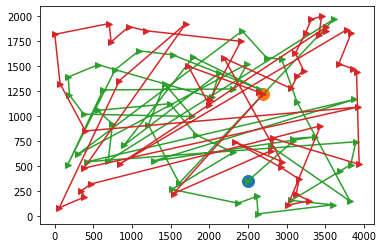

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


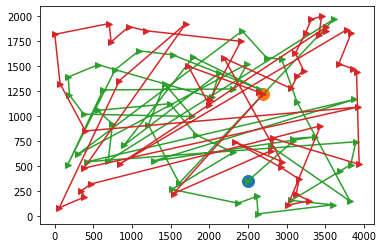

26 4
70 81
8 70


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


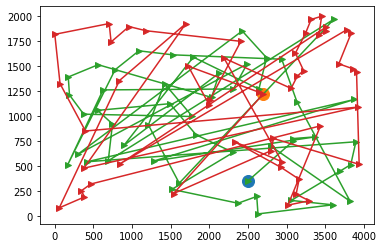

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


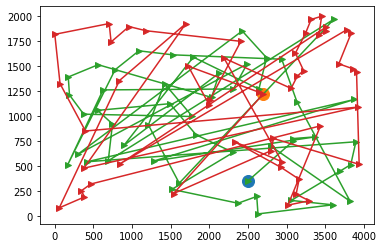

72 9
5 77
32 60


/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


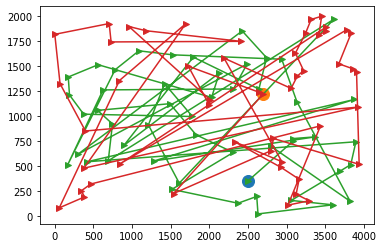

/home/i/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


7500


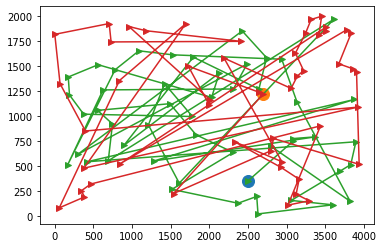







100%|██████████| 2/2 [01:00<00:00, 30.40s/it]


greedy_search- min:27885.441666760817, max:29340.260722467785, mean:28612.8511946143


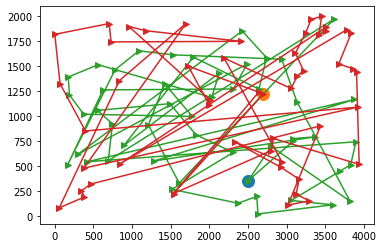

In [46]:
K = 2 # docelowo 10
for dataset_choice in ['kroa', 'krob']:
    if dataset_choice=="kroa":
        dataset=np_kroa
        dist=copy.deepcopy(dista)
    else:
        dataset=np_krob
        dist=copy.deepcopy(distb)
    
    cyclesTable = []
    distanceTable = []
    for _ in tqdm(range(K)):
        cycles, bestDistance = ILS1(dist, dataset, init_random = True, switch="change_edges", durationSec=30, shakeIt=3)
        distanceTable.append(bestDistance)
        cyclesTable.append(cycles )
    
    print(f"greedy_search- min:{np.min(distanceTable)}, max:{np.max(distanceTable)}, mean:{np.mean(distanceTable)}")


    cycles = cyclesTable[np.argmin(distanceTable)]
    plt.clf()
    plt.plot(dataset[:,0][cycles[0][0]], dataset[:,1][cycles[0][0]], "o", markersize=12)
    plt.plot(dataset[:,0][cycles[1][0]], dataset[:,1][cycles[1][0]], "o", markersize=12)                
    plt.plot(dataset[:,0][[*cycles[0],cycles[0][0]]], dataset[:,1][[*cycles[0],cycles[0][0]]], "->")
    plt.plot(dataset[:,0][[*cycles[1],cycles[1][1]]], dataset[:,1][[*cycles[1],cycles[1][1]]], "->")
    plt.show()
    
    #plt.savefig(f'greedy_search_best_NN_randomTrue_changeEdges_{dataset_choice}.png')


## (ILS2) Iterated local search - Iteracyjne przeszukiwanie lokalne z Large-scale neighborhood search, tj. większą perturbacją typu Destroy-Repair.